<a href="https://colab.research.google.com/github/sandhigupta/Sandhi/blob/main/dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r'LoadMinPower.csv', sep=',', header=0)
df.head(7)

,Date (month/day/year),Time,1,2,3,4,5,6,7,8,9,10,11
0,7/1/2012,0:00:00,0.586700,45.805173,1.381984,0.190083,1.892434,1.210491,0.192630,0.013212,1.490395,0.994408,0.526979
1,7/1/2012,0:30:00,7.376893,42.177474,1.289851,0.209479,0.773636,0.993516,0.256840,0.027524,0.042401,0.913134,0.535087
2,7/1/2012,1:00:00,6.781565,40.516599,1.289851,0.190083,0.752808,1.119133,0.186456,0.024221,0.076322,0.841422,0.543194
3,7/1/2012,1:30:00,5.211279,59.398121,1.259141,0.203660,0.535594,0.730862,0.113602,0.012111,0.019080,0.951380,0.421583
4,7/1/2012,2:00:00,4.693602,2.622434,1.289851,0.145472,0.654615,1.016355,0.187691,0.025322,0.095402,0.784052,0.462120
5,7/1/2012,2:30:00,5.150883,2.578726,1.320562,0.197841,0.508815,0.765121,0.102489,0.026423,0.209885,0.908353,0.535087
6,7/1/2012,3:00:00,5.280302,2.447605,1.397339,0.139653,0.717102,1.176231,0.182752,0.013212,0.065722,0.850983,0.510764


In [3]:
col_means = [np.array(df.get([f'{i}'])).mean() for i in range(1, 12)]
print(f" Means for all columns in the data set: \n{col_means}")

 Means for all columns in the data set: 
[2.6001453967446917, 4.860338390023402, 3.0818954532995435, 0.44231668384223743, 1.4445030776017693, 2.1517111577197485, 0.6008603246534246, 0.13592625371461187, 0.3460468516870434, 1.251038135477283, 0.9596871191652397]


In [4]:
col_vars = [np.array(df.get([f'{i}'])).var() for i in range(1, 12)]
print(f" Variance for all columns in the data set: \n{col_vars}")

 Variance for all columns in the data set: 
[7.1065135017116745, 64.14666762177022, 14.020998533068777, 0.30758108590942007, 0.9221125416438508, 5.187758988775928, 0.43672129112649516, 0.0891253556427413, 0.24543952283353931, 1.8664821652639871, 0.8900130171340858]


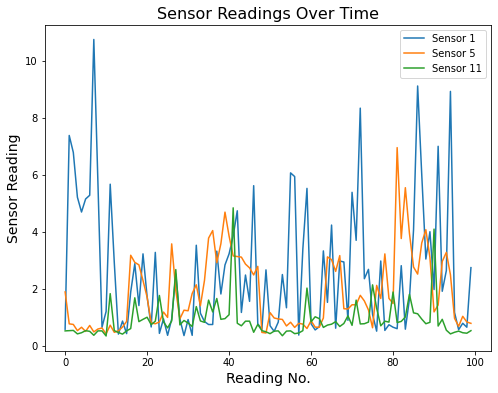

In [5]:
y = df['1'].to_numpy()[:100]
y2 = df['5'].to_numpy()[:100]
y3 = df['11'].to_numpy()[:100]
x = np.arange(0, len(y))
plt.figure(figsize=(8,6))
plt.xlabel('Reading No.',fontsize=14)
plt.ylabel('Sensor Reading',fontsize=14)
plt.title('Sensor Readings Over Time',fontsize=16)
plt.plot(x,y,label='Sensor 1')
plt.plot(y2, label = 'Sensor 5')
plt.plot(y3, label = 'Sensor 11')
plt.legend(loc='upper right')
plt.savefig('LoadMinSensor1,5,11first100nonDoSorFDIA')
plt.show()


In [6]:
initial_data = df.copy()

In [7]:
np.random.randint(-10, 10, 11)

array([-1, -3,  1,  5, -8, -5,  0,  7,  5,  2,  7])

In [8]:
t0 = time.perf_counter()
features = []
labels = []

for index, values in initial_data.iterrows():
  if np.random.random() < 0.5:
    false_reading = np.random.randint(-10, 10, 11)
    labels.append(1)
    features.append(false_reading)
    #initial_data.at[index] = false_reading
  else:
    features.append(list(values[2:]))
    labels.append(0)

t1 = time.perf_counter()
features = np.array(features)
labels = np.array(labels)

In [9]:
print(f"--------DATA-INJECTED-------- (In {t1-t0} Seconds)")


--------DATA-INJECTED-------- (In 1.8023771470000156 Seconds)


In [10]:
y = np.array([i[0] for i in features][:100])
y2 = np.array([i[4] for i in features][:100])
y3 = np.array([i[10] for i in features][:100])
print(f" Sensor 1 Mean: {y.mean()}, Variance: {y.var()}")
print(f" Sensor 2 Mean: {y2.mean()}, Variance: {y2.var()}")
print(f" Sensor 3 Mean: {y3.mean()}, Variance: {y3.var()}")

 Sensor 1 Mean: 0.7233037341499999, Variance: 25.289379101648855
 Sensor 2 Mean: 0.17125383841000003, Variance: 19.662290921822503
 Sensor 3 Mean: 1.0359361566899998, Variance: 18.82042876122249


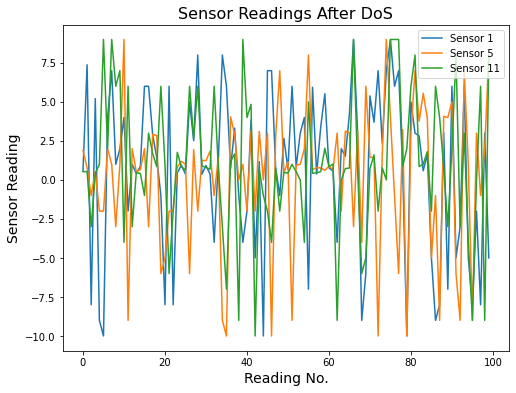

In [11]:
y = [i[0] for i in features][:100]
y2 = [i[4] for i in features][:100]
y3 = [i[10] for i in features][:100]
x = np.arange(0, len(y))
plt.figure(figsize=(8,6))
plt.xlabel('Reading No.',fontsize=14)
plt.ylabel('Sensor Reading',fontsize=14)
plt.title('Sensor Readings After DoS',fontsize=16)
plt.plot(x,y,label='Sensor 1')
plt.plot(y2, label = 'Sensor 5')
plt.plot(y3, label = 'Sensor 11')
plt.legend(loc='upper right')
plt.savefig('LoadMinSensor1,5,11afterDoS')
plt.show()

In [12]:
np.savetxt('min_features.csv', features, delimiter=',')
np.savetxt('min_labels.csv', labels, delimiter=',')
min_features = np.array(pd.read_csv('min_features.csv'))
min_labels = np.array(pd.read_csv('min_labels.csv')).astype(int)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(min_features, min_labels, test_size=0.3, random_state=1)

In [14]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.ravel())
knn_predictions = knn_model.predict(X_test)
print(f"Accuracy of KNN: {round(accuracy_score(y_test, knn_predictions)*100)}%")


Accuracy of KNN: 100%


In [15]:
svm = SVC()
svm.fit(X_train, y_train.ravel())
svm_predictions = svm.predict(X_test)
print(f"Accuracy of SVM: {round(accuracy_score(y_test, svm_predictions)*100)}%")

Accuracy of SVM: 100%


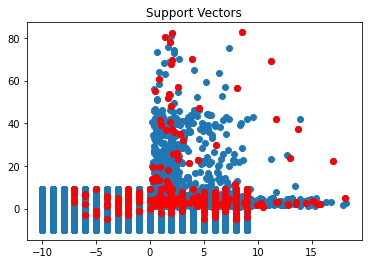

<Figure size 576x432 with 0 Axes>

In [16]:
support_vectors = svm.support_vectors_
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Support Vectors')
plt.figure(figsize=(8,6))
plt.show()

In [17]:
df = pd.read_csv(r'LoadMaxPower.csv')
df.head(7)

,Date (month/day/year),Time,1,2,3,4,5,6,7,8,9,10,11
0,7/1/2012,0:00:00,3.570531,53.091532,5.046160,0.645409,3.983360,2.621302,1.059980,0.407315,1.909899,1.487827,1.938000
1,7/1/2012,0:30:00,10.360724,49.463833,4.954028,0.664805,2.864563,2.404328,1.124190,0.421628,0.461906,1.406553,1.946107
2,7/1/2012,1:00:00,9.765395,47.802958,4.954028,0.645409,2.843734,2.529945,1.053806,0.418325,0.495827,1.334841,1.954215
3,7/1/2012,1:30:00,8.195110,66.684480,4.923317,0.658986,2.626521,2.141674,0.980952,0.406214,0.438585,1.444799,1.832604
4,7/1/2012,2:00:00,7.677433,9.908792,4.954028,0.600798,2.745542,2.427167,1.055040,0.419426,0.514907,1.277471,1.873141
5,7/1/2012,2:30:00,8.134714,9.865085,4.984738,0.653167,2.599741,2.175933,0.969839,0.420527,0.629390,1.401772,1.946107
6,7/1/2012,3:00:00,8.264133,9.733964,5.061515,0.594979,2.808028,2.587043,1.050101,0.407315,0.485226,1.344402,1.921785


In [18]:
t0 = time.perf_counter() 

features = []
labels = []

for index, values in df.iterrows():
  if np.random.random() < 0.5:
    false_reading = np.random.randint(999, 1001, 11)
    labels.append(1)
    features.append(false_reading)
  else:
    features.append(list(values[2:]))
    labels.append(0)

t1 = time.perf_counter()

In [19]:
features = np.array(features)
labels = np.array(labels)

print(f"--------DATA-INJECTED-------- (In {t1-t0} Seconds)")


--------DATA-INJECTED-------- (In 1.78881021899997 Seconds)


In [20]:
np.savetxt('max_features.csv', features, delimiter=',')
np.savetxt('max_labels.csv', labels, delimiter=',')
max_features = np.array(pd.read_csv('max_features.csv'))
max_labels = np.array(pd.read_csv('max_labels.csv')).astype(int)

In [21]:
knn_pred = knn_model.predict(max_features)
print(f" KNN: {accuracy_score(max_labels, knn_pred)}")

tn, fp, fn, tp = confusion_matrix(max_labels, knn_pred).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


 KNN: 0.5044237684799361
TN: 8837, FP: 0, FN: 8682, TP: 0


In [22]:
svm_pred = svm.predict(max_features)
print(f" SVM: {accuracy_score(max_labels, svm_pred)}")
tn, fp, fn, tp = confusion_matrix(max_labels, svm_pred).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

 SVM: 0.9993150293966551
TN: 8825, FP: 12, FN: 0, TP: 8682


In [23]:
confusion_matrix(max_labels, knn_pred)

array([[8837,    0],
       [8682,    0]])

In [24]:
confusion_matrix(max_labels, svm_pred)

array([[8825,   12],
       [   0, 8682]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


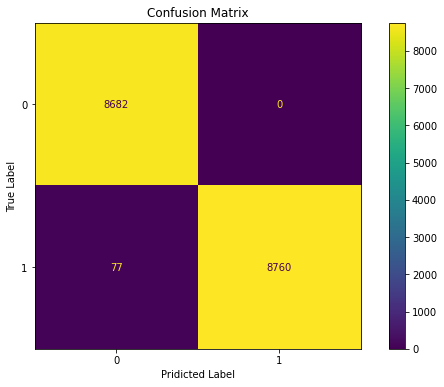

In [25]:
matrix = plot_confusion_matrix (knn_model, min_features, min_labels)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Pridicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


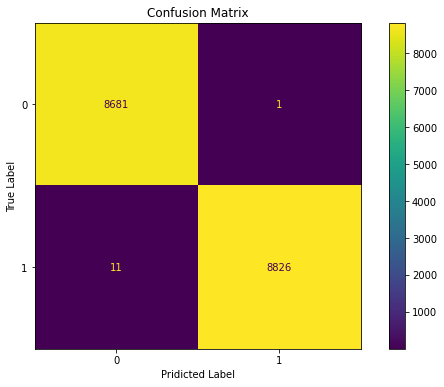

In [26]:
matrix = plot_confusion_matrix (svm, min_features, min_labels)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Pridicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()
